# Dijkstra’s Algorithm

### Created by Sezer UĞUZ

Assume the following weighted graph is given. To find the shortest path from a node (given as input) to another node (again provided as input by user) we want to use Dijkstra’s Algorithm.

1- I will use adjacency matrix to store the graph.

2- I will check if the two nodes are connected (the destination node is reachable from the source node).

3- I will find and print the Shortest Path.

4- I will show the Visualization of the Shortest Path.

<img src="graph/graph.jpg">

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jan  6 12:55:27 2019

@author: SEZER UĞUZ
"""

#I will import necessary library for this project.

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import scipy as sp

I will use self.edges for a dict of all possible next nodes, 

e.g. {'V1': ['V2', 'V3'], ...}

I will use self.weights for all the weights between two nodes, with the two nodes as a tuple as the key, 

e.g. {('V1', 'V2'): 9, ('V1', 'V3'): 12, ...}

In [2]:
# I will create a class called name GraphAlg (GraphAlg: Graph Algorithm)
class GraphAlg():
    def __init__(self):
        self.edges = defaultdict(list)
        self.weights = {}

# I will note that: I assume edges are bi-directional
    def add_edge(self, from_node, to_node, weight):
        self.edges[from_node].append(to_node)
        self.edges[to_node].append(from_node)
        self.weights[(from_node, to_node)] = weight
        self.weights[(to_node, from_node)] = weight

In [3]:
# I will create a graph using GraphAlg()
graph = GraphAlg()

# Here I will create variable callad name edges 
# and I will add adjacent edges and their values

edges = [
    ('V1', 'V2', 9),
    ('V1', 'V3', 12),
    ('V2', 'V3', 8),
    ('V2', 'V5', 7),
    ('V2', 'V4', 4),
    ('V4', 'V5', 2),
    ('V4', 'V7', 10),
    ('V7', 'V8', 4),
    ('V7', 'V9', 3),
    ('V8', 'V9', 13),
    ('V6', 'V8', 4),
    ('V3', 'V6', 2),
    ('V3', 'V5', 5),
    ('V5', 'V7', 2),
    ('V5', 'V6', 11),
]

for edge in edges:
    graph.add_edge(*edge)

# In addition, I want to draw the Dijsktra Shortest Path, that's why,
# I will use Networkx for drawing the graph.
# I will create a new varible called name G (Graph).
G = nx.DiGraph()

G.add_edges_from([('V1', 'V2')], weight = 9)
G.add_edges_from([('V1', 'V3')], weight = 12)
G.add_edges_from([('V2', 'V3')], weight = 8)
G.add_edges_from([('V2', 'V5')], weight = 7)
G.add_edges_from([('V2', 'V4'),('V6', 'V8'),('V7', 'V8')], weight = 4)
G.add_edges_from([('V3', 'V5')], weight = 5)
G.add_edges_from([('V3', 'V6'),('V4', 'V5'),('V5', 'V7')], weight = 2)
G.add_edges_from([('V4', 'V5')], weight = 2)
G.add_edges_from([('V4', 'V7')], weight = 10)
G.add_edges_from([('V7', 'V9')], weight = 3)
G.add_edges_from([('V8', 'V9')], weight = 13)
G.add_edges_from([('V5', 'V6')], weight = 11)

In [4]:
# I will create an Adjacency Matrix for the graph.
graph_adj = nx.adjacency_matrix(G)

In [5]:
# shortest paths is a dict of nodes
# whose value is a tuple of (previous node, weight)
def DijsktraShortestPath(graph, initial_node, end_node):
    shortest_paths = {initial_node: (None, 0)}
    current_node = initial_node
    visited = set()
    
    while current_node != end_node:
        visited.add(current_node)
        destinations = graph.edges[current_node]
        weight_to_current_node = shortest_paths[current_node][1]

        for next_node in destinations:
            weight = graph.weights[(current_node, next_node)] + weight_to_current_node
            if next_node not in shortest_paths:
                shortest_paths[next_node] = (current_node, weight)
            else:
                current_shortest_weight = shortest_paths[next_node][1]
                if current_shortest_weight > weight:
                    shortest_paths[next_node] = (current_node, weight)
        
        next_destinations = {node: shortest_paths[node] for node in shortest_paths 
                             if node not in visited}
        if not next_destinations:
            return 'Route Not Possible! Please try other nodes...'
        
        # next node is the destination with the lowest weight
        current_node = min(next_destinations, key = lambda k: next_destinations[k][1])
    
    # Work back through destinations in shortest path
    shortest_path = []
    while current_node is not None:
        shortest_path.append(current_node)
        next_node = shortest_paths[current_node][0]
        current_node = next_node
        
    # Reverse the shortest path
    shortest_path = shortest_path[::-1]
    return shortest_path

In [6]:
# I will show the Adjacency Matrix for the graph.
print(graph_adj.todense())

[[ 0  9 12  0  0  0  0  0  0]
 [ 0  0  8  7  4  0  0  0  0]
 [ 0  0  0  5  0  2  0  0  0]
 [ 0  0  0  0  0 11  0  2  0]
 [ 0  0  0  2  0  0  0 10  0]
 [ 0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0 13]
 [ 0  0  0  0  0  0  4  0  3]
 [ 0  0  0  0  0  0  0  0  0]]


In [7]:
# Here, I will create x and y variables for initial and final nodes.
# x and y will provided as input by user.
x = input("Enter the initial node: ")
y = input("Enter the final node: ")
print("\n")
print("Dijsktra Shortest Path between", x, "-", y, "is: \n", DijsktraShortestPath(graph, x, y))

Enter the initial node: V1
Enter the final node: V9


Dijsktra Shortest Path between V1 - V9 is: 
 ['V1', 'V2', 'V4', 'V5', 'V7', 'V9']


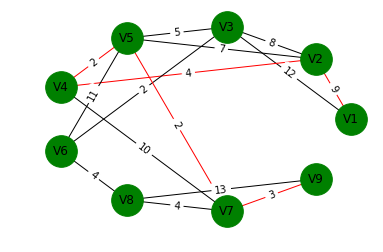

In [8]:
# I will take edges and weights from G for a new variable called name edge labels.
edge_labels = dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])

# This is very important for drawing the Dijsktra Shortest Path.
# I cloned the shortest path for drawing the graph, because when I try to path without cloned,
# shortest will draw wrongly.
# For example, our shortest path is ['V1', 'V2', 'V4', 'V5', 'V7', 'V9'], 
# shortest path represents red color, when I try to draw it
# Red color will be between ('V1'-'V2'), ('V4', 'V5') ('V7', 'V9'), 
# wil not be between ['V1', 'V2', 'V4', 'V5', 'V7', 'V9'].
# That's why, I thought about creating such a method.

# I cloned the shortest path for drawing the graph.
dijsktra_path = list(np.repeat(DijsktraShortestPath(graph, x, y), 2))

# After copying the path,
# I will delete the initial and final values. I do not need them for draw the path.

# Remove initial value
del dijsktra_path[0]

# Remove final value
dijsktra_path = dijsktra_path[:-1]

# I will divide our cloned shortest path.
# I will create each pair in a tuple.
# I will collect the pairs in items variable, pair process will be by chunk.
items, chunk = dijsktra_path, 2

# I will create dijsktra_graph with zip.
dijsktra_graph = zip(*[iter(items)]*chunk)

# I will transfer the dijsktra_graph information using list to resultList variable.
resultList = list(dijsktra_graph)

# I will specify the shortest path with red color.
red_edges = resultList

# I will create colors for graph.
# Our shortest path will be red, other will be black.
edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]

# Positions of nodes will be circular using networkx library.
pos=nx.circular_layout(G)

# I will add positions of edges to graph.
nx.draw_networkx_labels(G, pos)

# I will add weight of nodes to graph.
nx.draw_networkx_edge_labels(G,pos,edge_labels = edge_labels, arrows = False)

# I will add node colors, graph lines.
nx.draw(G,pos, node_color = 'green', node_size = 1000, edge_color = edge_colors, 
        edge_cmap = plt.cm.Reds, arrows=False)

# Show the graph
plt.show()